In [1]:
import scanpy as sc
import liana as li

In [2]:
adata = sc.read_h5ad("result.h5ad")

In [5]:
cluster_2clc = adata.obs.groupby("leiden")["cell_type"].value_counts(normalize=True).unstack().fillna(0)["2CLC"]
cluster_2clc = cluster_2clc[cluster_2clc > 0.5].index.to_list()
cluster_2clc

/tmp/ipykernel_3017719/3155967171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


['1', '4', '5', '8', '9', '12', '13', '15']

In [7]:
li.mt.rank_aggregate(adata,
                     groupby='leiden',
                     resource_name='consensus',
                     use_raw=False,
                     layer='log1p',
                     expr_prop=0.1,
                     verbose=True)

Using resource `consensus`.
Using the `log1p` layer!
/nfs/home/students/n.trummer/.conda/envs/liana/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/nfs/home/students/n.trummer/.conda/envs/liana/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 9535 samples and 1018 features
Assuming that counts were `natural` log-normalized!


/nfs/home/students/n.trummer/.conda/envs/liana/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Running CellPhoneDB


100%|██████████| 1000/1000 [00:06<00:00, 161.17it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


/nfs/home/students/n.trummer/.conda/envs/liana/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


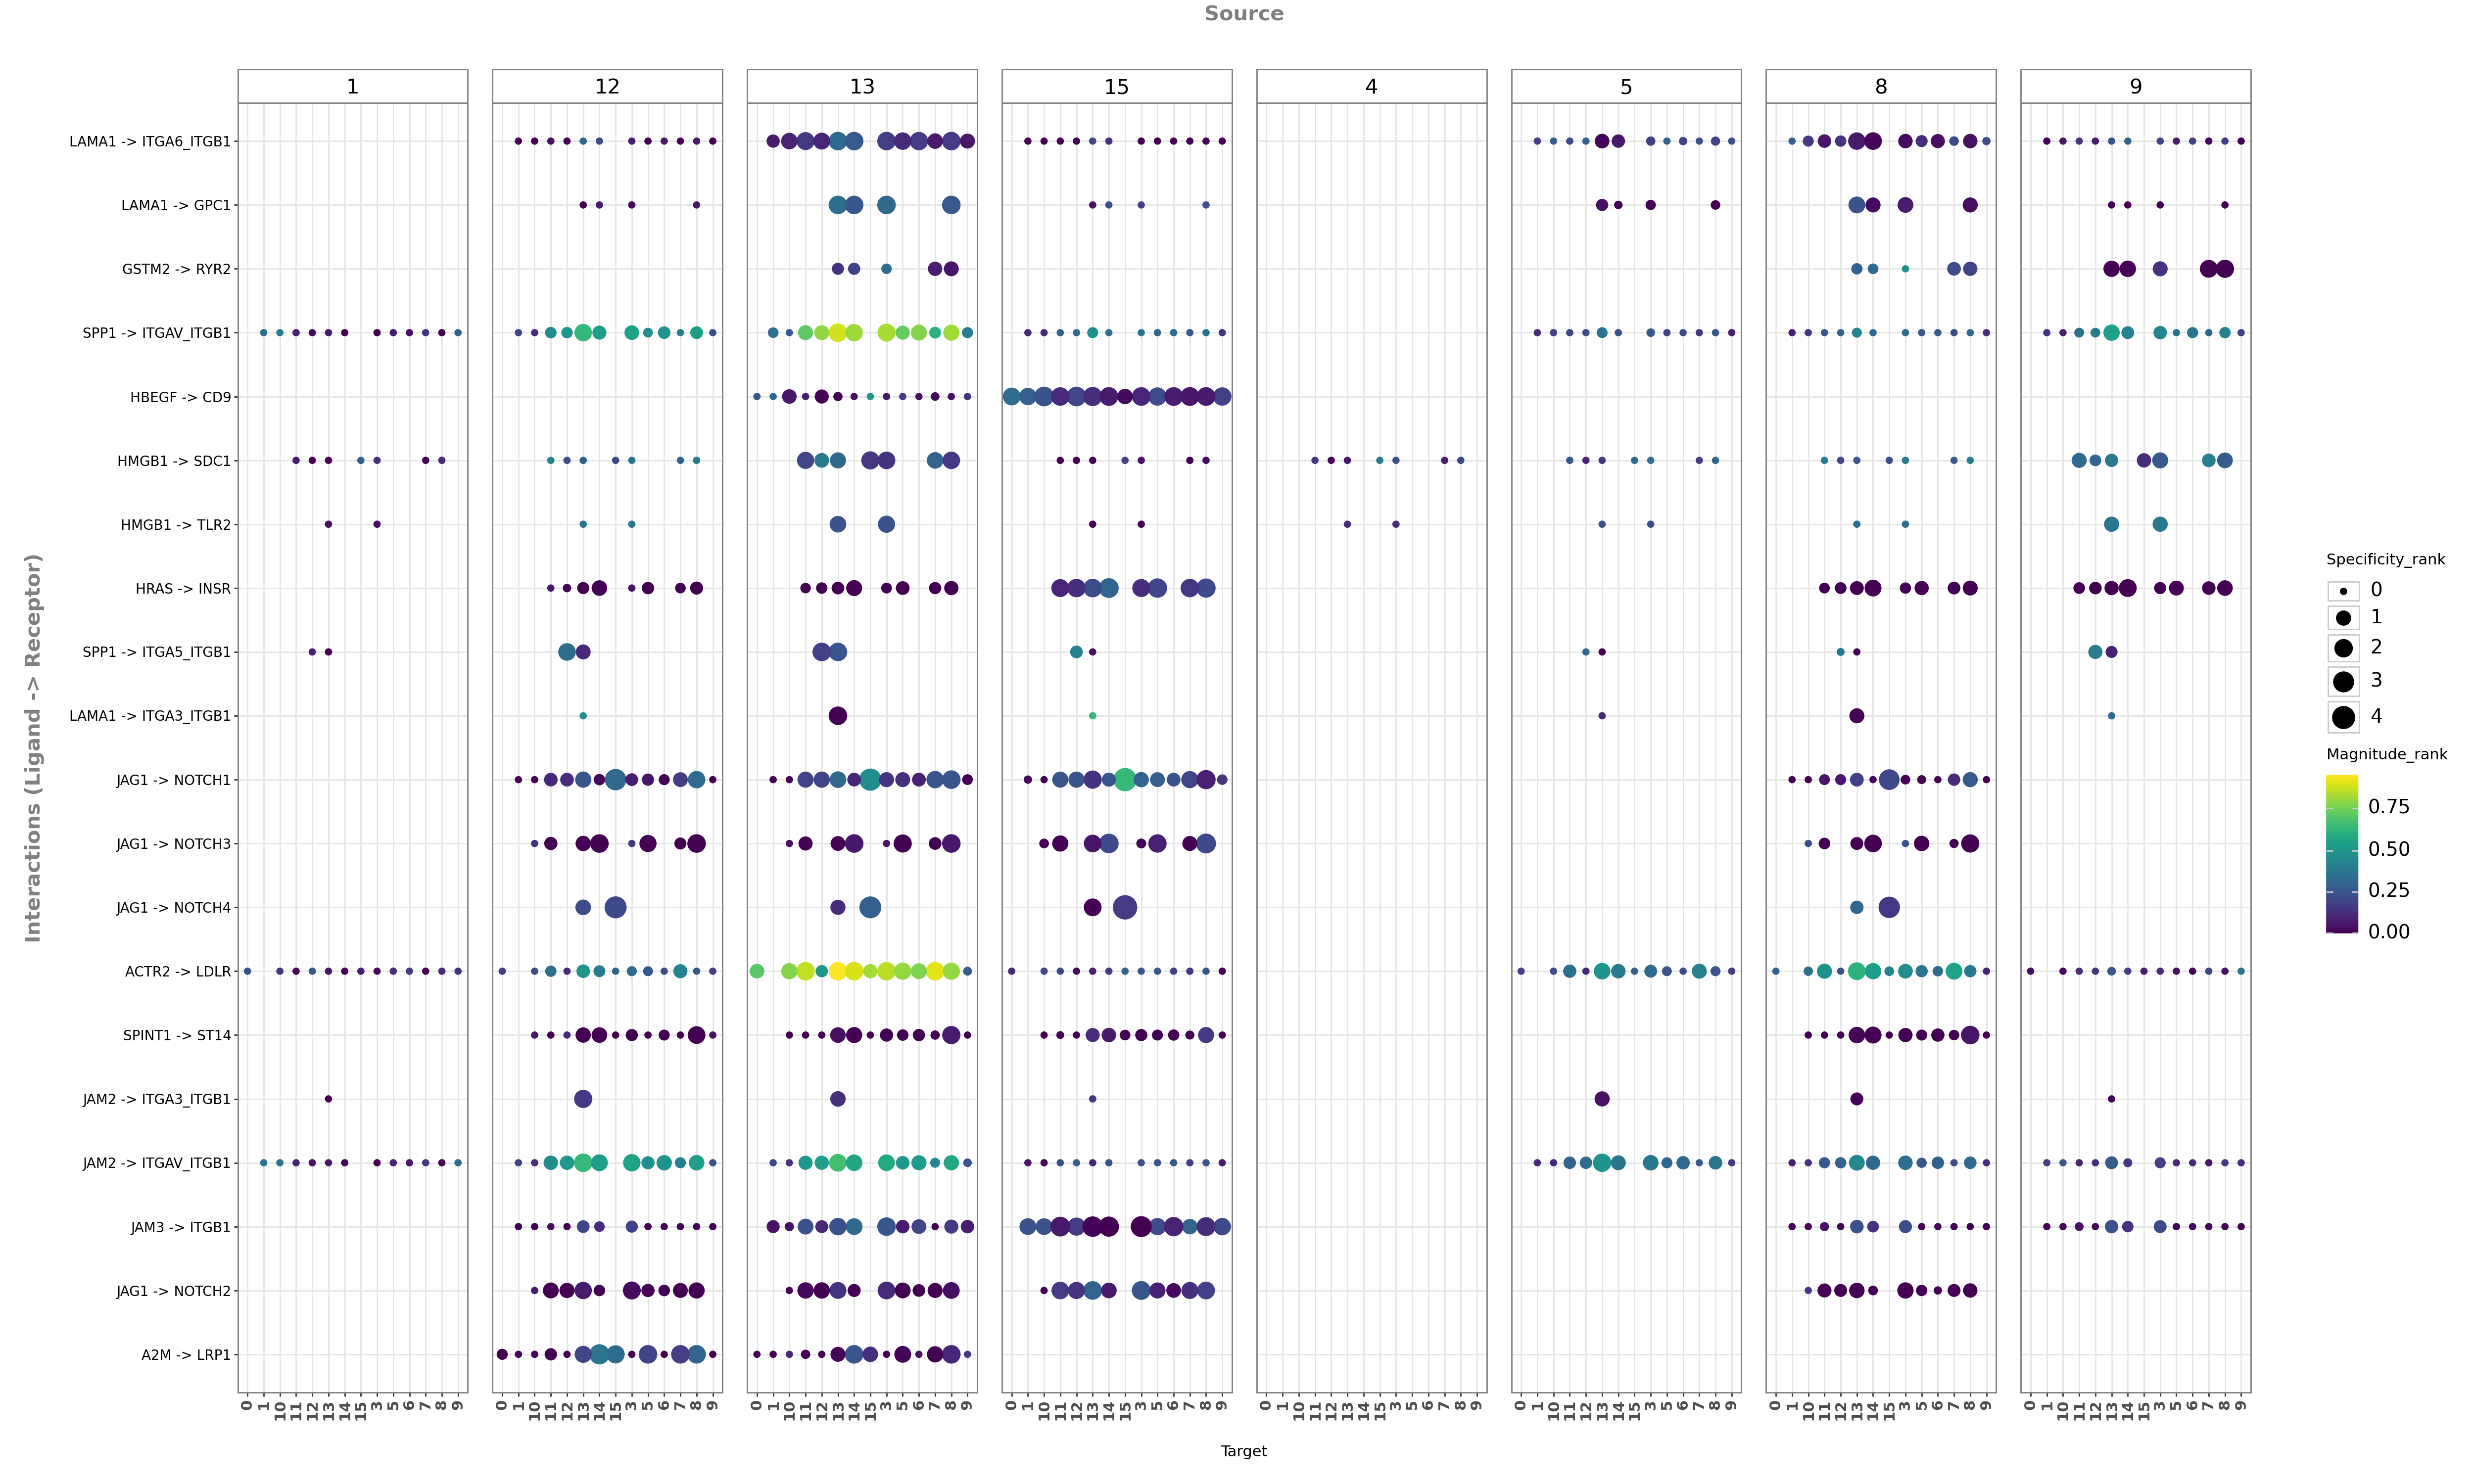

In [12]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cluster_2clc,
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=False,
              figure_size=(25, 15)
             )